# Machine Learning: Classification Model Development
<br>
Karen Itzell Larios Inzunza <br>

DAT-5303-FMsBA2 Hult International Business School<br><br><br>

<h2>Introduction: </h2> Continuing with the analysis of the database of Apprentice Chef in order to understand their new cross selling promotion, where subscribers receive a half bottle of wine from a local California vineyard every Wednesday. The insights seen through this analysis come from the development of a classification model by using different variables that are used to see the success of this cross selling promotion.

# 1. Initial Exploration of the Data

The very first thing is to import the necessary libraries, set the printing options and load the dataset.
The data could be checked just to make sure that it has loaded correctly, also the information to see what type of data it is and if it's necessary to make some transformations.

In [48]:
# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.utils import resample                   # to balance the model
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus 
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
Apprentice_Chef = pd.read_excel(file)


# checking the file
Apprentice_Chef.describe().round(decimals=2)


,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,unknown,potential_male,potential_female,junk,personal,professional
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43,0.71,0.21,0.08,0.2,0.44,0.36
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01,0.45,0.41,0.26,0.4,0.50,0.48
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00,1.00,0.00,0.00,0.0,1.00,1.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00,1.00,1.00,1.00,1.0,1.00,1.00


After we load the data we need to start to start analyzing the variables. This time the predicted outcome is the variable of CROSS_SELL_SUCCESS. Is a classification variable that states if a customer has subscribed to their promotion or not. We create a histogram and do a value count to know the exact number of subscribers.

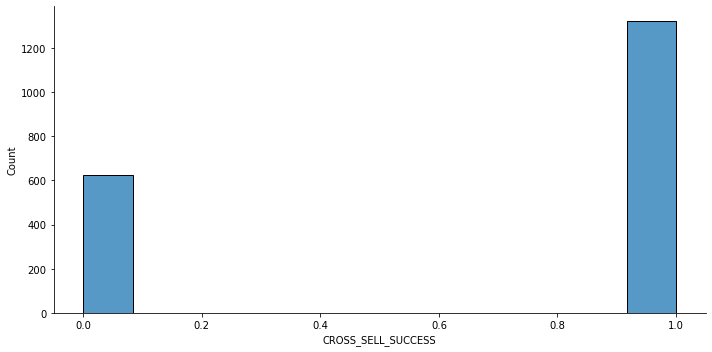

CROSS_SELL_SUCCESS
1    1321
0     625
dtype: int64

In [2]:
sns.displot(data = Apprentice_Chef,
            x = 'CROSS_SELL_SUCCESS',
            height = 5,
            aspect = 2)

plt.show()

Apprentice_Chef.value_counts('CROSS_SELL_SUCCESS')

The data is unbalanced, there are more 1's than 0's and this can cause a problem when trying to build a classification model. First, we will run a normal regression using the data as it is, to check the score, and from there do feature engineering and hyperparameter tuning to increase the score.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>
Defining the functions that will be used all through the analysis.

In [3]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [4]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [5]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

In [6]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Organizing the Variables</h2><br>
Separating male from female, as well as, the different email addresses.

In [7]:
#%pip install gender_guesser

In [8]:
# guessing gender based on (given) name

#import gender_guesser.detector as gender

# placeholder list
#placeholder_lst = []


# looping to guess gender
#for name in Apprentice_Chef['FIRST_NAME']:
#    guess = gender.Detector().get_gender(name)
#    print(guess)
#    placeholder_lst.append(guess)


# converting list into a series
#Apprentice_Chef['gender_guess'] = pd.Series(placeholder_lst)


In [9]:
# concatenating with original DataFrame
#Apprentice_Chef['domain_group'] = pd.Series(placeholder_lst)

# checking results
#Apprentice_Chef['domain_group'].value_counts()

In [10]:
#Creating dummies for Emails
#dummy_Email      = pd.get_dummies(Apprentice_Chef['domain_group'])

#Dropping EMAIL and domain_group from apprentice_chef
#Apprentice_Chef        = Apprentice_Chef.drop('gender_guess', axis = 1)
#Apprentice_Chef        = Apprentice_Chef.drop('domain_group', axis = 1)

#Joining the dummies to apprentice_chef
#Apprentice_Chef       = Apprentice_Chef.join([dummy_Email])


# saving new columns
#new_columns = Apprentice_Chef.columns

In [11]:
#Combining the columns to create a new one joining all the potential males
#Apprentice_Chef["potential_male"] = Apprentice_Chef["male"] + Apprentice_Chef["mostly_male"] + Apprentice_Chef["andy"] 

#Combining the columns to create a new one joining all the potential females
#Apprentice_Chef["potential_female"] = Apprentice_Chef["female"] + Apprentice_Chef["mostly_female"]

#Dropping andy, female, male, mostly_female, mostly_male
#Apprentice_Chef = Apprentice_Chef.drop(['andy', 'female', 'male', 'mostly_female', 'mostly_male'], axis = 1)

In [12]:
#Working with Categorical Data
#Splitting Emails

# STEP 1: splitting personal emails

# placeholder list
#placeholder_lst = []

# looping over each email address
#for index, col in Apprentice_Chef.iterrows():
    
    # splitting email domain at '@'
#    split_email = Apprentice_Chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
#    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
#email_df = pd.DataFrame(placeholder_lst)


# displaying the results
#email_df

In [13]:
#Setting Personal, Professional and Junk Emails
#personal_email_domains      = ['@gmail.com',
#                               '@yahoo.com',
#                               '@protonmail.com']

#professional_email_domains  = ['@mmm.com',
#                               '@amex.com',
#                               '@apple.com',
#                               '@boeing.com',
#                               '@caterpillar.com',
#                               '@chevron.com',
#                               '@cisco.com',
#                               '@cocacola.com',
#                               '@disney.com',
#                               '@dupont.com',
#                               '@exxon.com',
#                               '@ge.org',
#                               '@goldmansacs.com',
#                               '@homedepot.com',
#                               '@ibm.com',
#                               '@intel.com',
#                               '@jnj.com',
#                               '@jpmorgan.com',
#                               '@mcdonalds.com',
#                               '@merck.com',
#                               '@microsoft.com',
#                               '@nike.com',
#                               '@pfizer.com',
#                               '@pg.com',
#                               '@travelers.com',
#                               '@unitedtech.com',
#                               '@unitedhealth.com',
#                               '@verizon.com',
#                               '@visa.com',
#                               '@walmart.com']

#junk_email_domains          = ['@me.com',
#                               '@aol.com',
#                               '@hotmail.com',
#                               '@live.com',
#                               '@msn.com',
#                               '@passport.com']


# placeholder list
#placeholder_lst = []


# looping to group observations by domain type
#for domain in email_df[1]:
#        if '@' + domain in personal_email_domains:
#            placeholder_lst.append('personal')
            
#        elif '@' + domain in professional_email_domains:
#            placeholder_lst.append('professional')
           
#        elif '@' + domain in junk_email_domains:
#            placeholder_lst.append('junk')
            
#        else:
#            print('Unknown')


# concatenating with original DataFrame
#Apprentice_Chef['domain_group'] = pd.Series(placeholder_lst)

# checking results
#Apprentice_Chef['domain_group'].value_counts()

In [14]:
#Creating dummies for Emails
#dummy_Email      = pd.get_dummies(Apprentice_Chef['domain_group'])

#Dropping EMAIL and domain_group from apprentice_chef
#Apprentice_Chef        = Apprentice_Chef.drop('EMAIL', axis = 1)
#Apprentice_Chef        = Apprentice_Chef.drop('domain_group', axis = 1)

#Joining the dummies to apprentice_chef
#Apprentice_Chef       = Apprentice_Chef.join([dummy_Email])


# saving new columns
#new_columns = Apprentice_Chef.columns

In [15]:
# saving results
#Apprentice_Chef.to_excel('./Apprentice_Chef_Dataset.xlsx',
#                 index = False)

In [55]:
# counting the number of outliers using the continuos variables
#Setting thresholds based on the previous scatterplots and the standard deviations of each variable
timeonsitevisit_zeroes   = len(Apprentice_Chef['AVG_TIME_PER_SITE_VISIT'][Apprentice_Chef['AVG_TIME_PER_SITE_VISIT'] > 186])
prepvideotime_zeroes  = len(Apprentice_Chef['AVG_PREP_VID_TIME'][Apprentice_Chef['AVG_PREP_VID_TIME'] > 148])
photos_zeroes      = len(Apprentice_Chef['TOTAL_PHOTOS_VIEWED'][Apprentice_Chef['TOTAL_PHOTOS_VIEWED'] > 543])
mealsordered_zeroes = len(Apprentice_Chef['TOTAL_MEALS_ORDERED'][Apprentice_Chef['TOTAL_MEALS_ORDERED'] > 165])
uniquemeals_zeroes   = len(Apprentice_Chef['UNIQUE_MEALS_PURCH'][Apprentice_Chef['UNIQUE_MEALS_PURCH'] > 10])
customerservice_zeroes  = len(Apprentice_Chef['CONTACTS_W_CUSTOMER_SERVICE'][Apprentice_Chef['CONTACTS_W_CUSTOMER_SERVICE'] > 7])
productsviewed_zeroes      = len(Apprentice_Chef['PRODUCT_CATEGORIES_VIEWED'][Apprentice_Chef['PRODUCT_CATEGORIES_VIEWED'] > 9])
cancellationsbefore_zeroes = len(Apprentice_Chef['CANCELLATIONS_BEFORE_NOON'][Apprentice_Chef['CANCELLATIONS_BEFORE_NOON'] == 0])
cancellationsafter_zeroes = len(Apprentice_Chef['CANCELLATIONS_AFTER_NOON'][Apprentice_Chef['CANCELLATIONS_AFTER_NOON'] == 0])
mobilelogins_zeroes = len(Apprentice_Chef['MOBILE_LOGINS'][Apprentice_Chef['MOBILE_LOGINS'] > 1])
pclogins_zeroes = len(Apprentice_Chef['PC_LOGINS'][Apprentice_Chef['PC_LOGINS'] > 1])
weeklyplan_zeroes = len(Apprentice_Chef['WEEKLY_PLAN'][Apprentice_Chef['WEEKLY_PLAN'] > 41])
earlydelivery_zeroes = len(Apprentice_Chef['EARLY_DELIVERIES'][Apprentice_Chef['EARLY_DELIVERIES'] == 0])
latedelivery_zeroes = len(Apprentice_Chef['LATE_DELIVERIES'][Apprentice_Chef['LATE_DELIVERIES'] == 0])
largestorder_zeroes = len(Apprentice_Chef['LARGEST_ORDER_SIZE'][Apprentice_Chef['LARGEST_ORDER_SIZE'] > 5])
medianmealrating_zeroes = len(Apprentice_Chef['MEDIAN_MEAL_RATING'][Apprentice_Chef['MEDIAN_MEAL_RATING'] >2 ])
clickspervisit_zeroes = len(Apprentice_Chef['AVG_CLICKS_PER_VISIT'][Apprentice_Chef['AVG_CLICKS_PER_VISIT'] >7 ])
classattended_zeroes = len(Apprentice_Chef['MASTER_CLASSES_ATTENDED'][Apprentice_Chef['MASTER_CLASSES_ATTENDED'] == 0])
revenue_zeroes = len(Apprentice_Chef['REVENUE'][Apprentice_Chef['REVENUE'] > 3414])


# printing a table of the results
print(f"""
                           No\t\tYes
                      ---------------------
Avg Time per Site Visit        | {timeonsitevisit_zeroes}\t\t{len(Apprentice_Chef) - timeonsitevisit_zeroes}
Avg Prep Video Time            | {prepvideotime_zeroes}\t\t{len(Apprentice_Chef) - prepvideotime_zeroes}
Photos Viewed                  | {photos_zeroes}\t\t{len(Apprentice_Chef) - photos_zeroes}
Total Meals Ordered            | {mealsordered_zeroes}\t\t{len(Apprentice_Chef) - mealsordered_zeroes}
Unique Meals Purchased         | {uniquemeals_zeroes}\t\t{len(Apprentice_Chef) - uniquemeals_zeroes}
Contact with Customer Service  | {customerservice_zeroes}\t\t{len(Apprentice_Chef) - customerservice_zeroes}
Products Viewed                | {productsviewed_zeroes}\t\t{len(Apprentice_Chef) - productsviewed_zeroes}
Cancellations before noon      | {cancellationsbefore_zeroes}\t\t{len(Apprentice_Chef) - cancellationsbefore_zeroes}
Cancellations after noon       | {cancellationsafter_zeroes}\t\t{len(Apprentice_Chef) - cancellationsafter_zeroes}
Mobile Logins                  | {mobilelogins_zeroes}\t\t{len(Apprentice_Chef) - mobilelogins_zeroes}
PC Logins                      | {pclogins_zeroes}\t\t{len(Apprentice_Chef) - pclogins_zeroes}
Weekly Plan                    | {weeklyplan_zeroes}\t\t{len(Apprentice_Chef) - weeklyplan_zeroes}
Early Deliveries               | {earlydelivery_zeroes}\t\t{len(Apprentice_Chef) - earlydelivery_zeroes}
Late Deliveries                | {latedelivery_zeroes}\t\t{len(Apprentice_Chef) - latedelivery_zeroes}
Largest Order Size             | {largestorder_zeroes}\t\t{len(Apprentice_Chef) - largestorder_zeroes}
Median Meal Rating             | {medianmealrating_zeroes}\t\t{len(Apprentice_Chef) - medianmealrating_zeroes}
Average Clicks per Visit       | {clickspervisit_zeroes}\t\t{len(Apprentice_Chef) - clickspervisit_zeroes}
Master Class Attended          | {classattended_zeroes}\t\t{len(Apprentice_Chef) - classattended_zeroes}
Revenue                        | {revenue_zeroes}\t\t{len(Apprentice_Chef) - revenue_zeroes}
""")


                           No		Yes
                      ---------------------
Avg Time per Site Visit        | 87		1859
Avg Prep Video Time            | 930		1016
Photos Viewed                  | 66		1880
Total Meals Ordered            | 135		1811
Unique Meals Purchased         | 12		1934
Contact with Customer Service  | 678		1268
Products Viewed                | 287		1659
Cancellations before noon      | 667		1279
Cancellations after noon       | 1667		279
Mobile Logins                  | 931		1015
PC Logins                      | 1946		0
Weekly Plan                    | 131		1815
Early Deliveries               | 1167		779
Late Deliveries                | 319		1627
Largest Order Size             | 407		1539
Median Meal Rating             | 1360		586
Average Clicks per Visit       | 1940		6
Master Class Attended          | 932		1014
Revenue                        | 247		1699



In [56]:
# Avg time per Site Visit and Photos Viewed were removed since they doesn't follow the rule for flag-based features

# dummy variable for ordering total meals within the range
Apprentice_Chef['TOTAL_MEALS_ORDERED_range']   = 0
Apprentice_Chef['AVG_PREP_VID_TIME_range'] = 0
Apprentice_Chef['CONTACTS_W_CUSTOMER_SERVICE_range'] = 0
Apprentice_Chef['PRODUCT_CATEGORIES_VIEWED_range']   = 0
Apprentice_Chef['CANCELLATIONS_BEFORE_NOON_range']   = 0
Apprentice_Chef['CANCELLATIONS_AFTER_NOON_range']    = 0
Apprentice_Chef['MOBILE_LOGINS_range']               = 0
Apprentice_Chef['WEEKLY_PLAN_range']                 = 0
Apprentice_Chef['EARLY_DELIVERIES_range']            = 0
Apprentice_Chef['LATE_DELIVERIES_range']             = 0
Apprentice_Chef['LARGEST_ORDER_SIZE_range']          = 0
Apprentice_Chef['MEDIAN_MEAL_RATING_range']          = 0
Apprentice_Chef['MASTER_CLASSES_ATTENDED_range']     = 0
Apprentice_Chef['REVENUE_range'] = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in Apprentice_Chef.iterrows():
    
    # TOTAL_MEALS_ORDERED
    if Apprentice_Chef.loc[index, 'TOTAL_MEALS_ORDERED'] < 165:
        Apprentice_Chef.loc[index, 'TOTAL_MEALS_ORDERED_range'] = 1
        
    
    # AVG_PREP_VID_TIME
    if Apprentice_Chef.loc[index, 'AVG_PREP_VID_TIME'] < 148:
        Apprentice_Chef.loc[index, 'AVG_PREP_VID_TIME_range'] = 1
        
    # CONTACTS_W_CUSTOMER_SERVICE
    if Apprentice_Chef.loc[index, "CONTACTS_W_CUSTOMER_SERVICE"] > 0:
        Apprentice_Chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE_range'] = 1
        
        
    # PRODUCT_CATEGORIES_VIEWED
    if Apprentice_Chef.loc[index, "PRODUCT_CATEGORIES_VIEWED"] > 0:
        Apprentice_Chef.loc[index, 'PRODUCT_CATEGORIES_VIEWED_range'] = 1

    # CANCELLATIONS_BEFORE_NOON
    if Apprentice_Chef.loc[index, "CANCELLATIONS_BEFORE_NOON"] > 0:
        Apprentice_Chef.loc[index, 'CANCELLATIONS_BEFORE_NOON_range'] = 1
        
    # CANCELLATIONS_AFTER_NOON
    if Apprentice_Chef.loc[index, "CANCELLATIONS_AFTER_NOON"] > 0:
        Apprentice_Chef.loc[index, 'CANCELLATIONS_AFTER_NOON_range'] = 1
        
    # MOBILE_LOGINS
    if Apprentice_Chef.loc[index, "MOBILE_LOGINS"] > 0:
        Apprentice_Chef.loc[index, 'MOBILE_LOGINS_range'] = 1
               
    # WEEKLY_PLAN
    if Apprentice_Chef.loc[index, "WEEKLY_PLAN"] > 0:
        Apprentice_Chef.loc[index, 'WEEKLY_PLAN_range'] = 1
        
    # EARLY_DELIVERIES
    if Apprentice_Chef.loc[index, "EARLY_DELIVERIES"] > 0:
        Apprentice_Chef.loc[index, 'EARLY_DELIVERIES_range'] = 1
        
    # LATE_DELIVERIES
    if Apprentice_Chef.loc[index, "LATE_DELIVERIES"] > 0:
        Apprentice_Chef.loc[index, 'LATE_DELIVERIES_range'] = 1
        
    # LARGEST_ORDER_SIZE
    if Apprentice_Chef.loc[index, "LARGEST_ORDER_SIZE"] > 0:
        Apprentice_Chef.loc[index, 'LARGEST_ORDER_SIZE_range'] = 1

    # MEDIAN_MEAL_RATING
    if Apprentice_Chef.loc[index, "MEDIAN_MEAL_RATING"] > 0:
        Apprentice_Chef.loc[index, 'MEDIAN_MEAL_RATING_range'] = 1
        
    # MASTER_CLASSES_ATTENDED
    if Apprentice_Chef.loc[index, "MASTER_CLASSES_ATTENDED"] > 0:
        Apprentice_Chef.loc[index, 'MASTER_CLASSES_ATTENDED_range'] = 1
        
    #Revenue
    if Apprentice_Chef.loc[index, "REVENUE"] < 3414:
        Apprentice_Chef.loc[index, 'REVENUE_range'] = 1

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Correlation Analysis</h4>
Checking the correlation between the variables to see the significance towards the desired output, CROSS_SELL_SUCCESS.

In [57]:
df_corr = Apprentice_Chef.corr(method='pearson').round(decimals=2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS                   1.00
professional                         0.19
CANCELLATIONS_BEFORE_NOON            0.16
CANCELLATIONS_BEFORE_NOON_range      0.14
potential_male                       0.11
MOBILE_NUMBER                        0.10
TASTES_AND_PREFERENCES               0.08
REFRIGERATED_LOCKER                  0.07
MASTER_CLASSES_ATTENDED_range        0.05
PACKAGE_LOCKER                       0.04
CONTACTS_W_CUSTOMER_SERVICE          0.04
MASTER_CLASSES_ATTENDED              0.04
personal                             0.04
PC_LOGINS                            0.04
AVG_PREP_VID_TIME                    0.03
MEDIAN_MEAL_RATING                   0.03
LARGEST_ORDER_SIZE                   0.02
TOTAL_MEALS_ORDERED_range            0.02
EARLY_DELIVERIES                     0.02
TOTAL_PHOTOS_VIEWED                  0.01
AVG_TIME_PER_SITE_VISIT              0.01
MOBILE_LOGINS_range                  0.01
TOTAL_MEALS_ORDERED                  0.01
LATE_DELIVERIES                   

The correlation of the variables are not so high.</br>
<br>
The highest correlation is the junk email which is a negative correlation. The highest positive is professional email. We need deeper analysis to see if this variables can create an impact on CROSS_SELL_SUCCESS.
<br>
<br>
Next, we are going to create a logistic regression.

In [58]:
# declaring explanatory variables
Apprentice_Chef_data = Apprentice_Chef.drop(['CROSS_SELL_SUCCESS', 'NAME', 'FIRST_NAME', 'FAMILY_NAME', ], axis=1)


# declaring response variable
Apprentice_Chef_response = Apprentice_Chef.loc[:, 'CROSS_SELL_SUCCESS']

In [59]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            Apprentice_Chef_data,
            Apprentice_Chef_response,
            test_size    = 0.25,
            random_state = 219,
            stratify     = Apprentice_Chef_response)


# merging training data for statsmodels
Apprentice_Chef_train = pd.concat([X_train, y_train], axis = 1)

In [60]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")






Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>2. Analyzing the models</h2><br>
<h4>Logistic Regression</h4>
The first model is just using the variable that has the highest correlation, junk email.

In [20]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ junk""",
                           data    = Apprentice_Chef_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.590544
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                 0.05958
Time:                        14:19:37   Log-Likelihood:                -861.60
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.483e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0659      0.067     15.922      0.000       0.935       1.197
junk          -1.4166      0.137    -10.331      0.000      -1.685      -1.148
==============================================================================
"""

The model showed a very low R-squared but it also shows a P-value of 0.00 which means that it can be significant.
<br>
<br>
Now we are going to create another model using all the variables.

In [61]:
for val in Apprentice_Chef_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 unknown + 
 potential_male + 
 potential_female + 
 junk + 
 personal + 
 professional + 
 TOTAL_MEALS_ORDERED_range + 
 AVG_PREP_VID_TIME_range + 
 CONTACTS_W_CUSTOMER_SERVICE_range + 
 PRODUCT_CATEGORIES_VIEWED_range + 
 CANCELLATIONS_BEFORE_NOON_range + 
 CANCELLATIONS_AFTER_NOON_range + 
 MOBILE_LOGINS_range + 
 WEEKLY_PLAN_range + 
 EARLY_DELIVERIES_range + 
 LATE_DELIVERIES_range + 
 LARGEST_ORDER_SIZE_range + 
 MEDIAN_MEAL_RATING_range + 
 MASTER_CLASSES_ATT

In [63]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 unknown + 
 junk + 
 personal + 
 professional + 
 potential_male + 
 potential_female +
 TOTAL_MEALS_ORDERED_range + 
 AVG_PREP_VID_TIME_range + 
 CONTACTS_W_CUSTOMER_SERVICE_range + 
 PRODUCT_CATEGORIES_VIEWED_range + 
 CANCELLATIONS_BEFORE_NOON_range + 
 CANCELLATIONS_AFTER_NOON_range + 
 MOBILE_LOGINS_range + 
 WEEKLY_PLAN_range + 
 EARLY_DELIVERIES_range + 
 LATE_DELIVERIES_range + 
 LARGEST_ORDER_SIZE_range + 
 MEDIAN_MEAL_RATING_range + 
 MASTER_CLASSES_ATTENDED_range + 
 REVENUE_range""",  data    = Apprentice_Chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.532696
         Iterations 10


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1421
Method:                           MLE   Df Model:                           37
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                  0.1517
Time:                        17:24:17   Log-Likelihood:                -777.20
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.052e-38
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0633        nan        nan        nan         nan         nan
REVENUE                              -0.0001      0.000     -0.656      0.512      -0.001       0.000
TOTAL_MEALS_ORDERED                   0.0028      0.007      0.421      0.673      -0.010       0.016
UNIQUE_MEALS_PURCH                   -0.0157        nan        nan        nan         nan         nan
CONTACTS_W_CUSTOMER_SERVICE           0.0725      0.046      1.561      0.118      -0.019       0.164
PRODUCT_CATEGORIES_VIEWED            -0.0196      0.046     -0.426      0.670      -0.110       0.071
AVG_TIME_PER_SITE_VISIT               0.0003        nan        nan        nan         nan         nan
MOBILE_NUMBER                         0.9529        nan        nan        nan         nan         nan
CANCELLATIONS_BEFORE_NOON             0.2331      0.071      3.269      0.001       0.093       0.373
CANCELLATIONS_AFTER_NOON             -0.4566        nan        nan        nan         nan         nan
TASTES_AND_PREFERENCES                0.3505        nan        nan        nan         nan         nan
PC_LOGINS                             0.2609      0.162      1.612      0.107      -0.056       0.578
MOBILE_LOGINS                        -0.2738      0.459     -0.597      0.551      -1.173       0.625
WEEKLY_PLAN                           0.0076      0.007      1.092      0.275      -0.006       0.021
EARLY_DELIVERIES                      0.1408      0.046      3.039      0.002       0.050       0.232
LATE_DELIVERIES                       0.0098      0.028      0.353      0.724      -0.045       0.064
PACKAGE_LOCKER                        0.0505      0.239      0.212      0.832      -0.417       0.518
REFRIGERATED_LOCKER                   0.4561      0.269      1.698      0.090      -0.070       0.983
AVG_PREP_VID_TIME                     0.0039        nan        nan        nan         nan         nan
LARGEST_ORDER_SIZE                   -0.0276      0.200     -0.138      0.890      -0.419       0.364
MASTER_CLASSES_ATTENDED              -0.1245      0.486     -0.256      0.798      -1.077       0.828
MEDIAN_MEAL_RATING                    0.1402      0.606      0.232      0.817      -1.047       1.327
AVG_CLICKS_PER_VISIT                 -0.0154        nan        nan        nan         nan         nan
TOTAL_PHOTOS_VIEWED                  -0.0003      0.000     -0.656      0.512      -0.001       0.001
unknown                              -0.3249        nan        nan        nan         nan         nan
junk                                 -1.4350   4.24e+06  -3.38e-07      1.000   -8.32e+06    8.32e+06
personal                             -0.0459        nan        nan        nan         nan         nan
professional                          0.5063        nan        nan        nan         nan         nan
potential_male                        0.2780   1.39e+05   2.01e-06      1.000  

The model shows not so much improvement with only an R-square of 0.14. A lot of the P-values of the coefficients are not siginificant, after doing this we will see if the model improves.
<br>
<br>
We create a new model using only significant variables.

In [72]:
#2 instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~   
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON +  
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 EARLY_DELIVERIES +  
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 personal + 
 potential_male + 
 potential_female +
 TOTAL_MEALS_ORDERED_range + 
 AVG_PREP_VID_TIME_range + 
 CONTACTS_W_CUSTOMER_SERVICE_range + 
 CANCELLATIONS_BEFORE_NOON_range + 
 CANCELLATIONS_AFTER_NOON_range +  
 EARLY_DELIVERIES_range + 
 LATE_DELIVERIES_range""",  data    = Apprentice_Chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.586456
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1441
Method:                           MLE   Df Model:                           17
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                 0.06609
Time:                        17:28:33   Log-Likelihood:                -855.64
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 9.475e-18
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.1939   8.39e+06  -1.42e-07      1.000   -1.64e+07    1.64e+07
MOBILE_NUMBER                         0.7457      0.169      4.412      0.000       0.414       1.077
CANCELLATIONS_BEFORE_NOON             0.1990      0.061      3.278      0.001       0.080       0.318
TASTES_AND_PREFERENCES                0.3192      0.129      2.484      0.013       0.067       0.571
PC_LOGINS                             0.2149      0.102      2.117      0.034       0.016       0.414
MOBILE_LOGINS                        -0.1591      0.111     -1.431      0.152      -0.377       0.059
EARLY_DELIVERIES                      0.1198      0.043      2.760      0.006       0.035       0.205
REFRIGERATED_LOCKER                   0.4367      0.201      2.176      0.030       0.043       0.830
AVG_PREP_VID_TIME                     0.0020      0.002      1.091      0.275      -0.002       0.006
personal                              0.1927      0.119      1.617      0.106      -0.041       0.426
potential_male                        0.5235      0.153      3.424      0.001       0.224       0.823
potential_female                     -0.6299      0.209     -3.015      0.003      -1.039      -0.220
TOTAL_MEALS_ORDERED_range             0.4360      0.236      1.845      0.065      -0.027       0.899
AVG_PREP_VID_TIME_range              -0.1590      0.180     -0.886      0.376      -0.511       0.193
CONTACTS_W_CUSTOMER_SERVICE_range    -1.1939   8.39e+06  -1.42e-07      1.000   -1.64e+07    1.64e+07
CANCELLATIONS_BEFORE_NOON_range       0.2583      0.167      1.542      0.123      -0.070       0.586
CANCELLATIONS_AFTER_NOON_range       -0.2325      0.163     -1.423      0.155      -0.553       0.088
EARLY_DELIVERIES_range               -0.3664      0.197     -1.860      0.063      -0.752       0.020
LATE_DELIVERIES_range                 0.1293      0.157      0.825      0.410      -0.178       0.437
=====================================================================================================
"""

The R-square did not improve but we found some variables that are significant.
<br>
<br>
Now we create different dictionaries with potential models.

In [24]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
                   'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
                   'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
                   'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 
                  'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER',
                  'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                  'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'unknown', 'junk', 'personal', 'professional',
                  'potential_male', 'potential_female'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 
                  'AVG_PREP_VID_TIME', 'junk', 'professional', 'potential_male', 'potential_female'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON','MOBILE_LOGINS', 'EARLY_DELIVERIES',
                  'AVG_PREP_VID_TIME', 'personal', 'professional', 'potential_male', 'potential_female'],
 
 # significant variables only (set 3)
 'logit_sig_3'  : ['MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON','MOBILE_LOGINS', 'EARLY_DELIVERIES',
                  'AVG_PREP_VID_TIME', 'personal', 'junk', 'potential_male', 'potential_female']
    
}

In [25]:
# train/test split with one set of significant variables
Apprentice_Chef_data   =  Apprentice_Chef.loc[ : , candidate_dict['logit_sig_2']]
Apprentice_Chef_target =  Apprentice_Chef.loc[ : , 'CROSS_SELL_SUCCESS']


# Split the data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
            Apprentice_Chef_data,
            Apprentice_Chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = Apprentice_Chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            max_iter = 1000,
                            random_state = 219)

# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(X_test, y_test).round(4) # accuracy

# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

Training ACCURACY: 0.7354
Testing  ACCURACY: 0.7228
0.6266


Checking all the different dictionaries created, the one that does not have a big gap between the training and testing is 'logit_sig_2'. So we are going to use this set of variables with different models to check if the AUC can be improved.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /r><br>
<h4>Balancing the outcome variable</h4>
By upsampling the minority class, the dataset will be balanced. This will allow us to work better with a machine learning model.

In [26]:
# Separate majority and minority classes
Apprentice_Chef_majority = Apprentice_Chef[Apprentice_Chef.CROSS_SELL_SUCCESS==1]
Apprentice_Chef_minority = Apprentice_Chef[Apprentice_Chef.CROSS_SELL_SUCCESS==0]
 
# Upsample minority class
Apprentice_Chef_minority_upsampled = resample(Apprentice_Chef_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1321,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
Apprentice_Chef_upsampled = pd.concat([Apprentice_Chef_majority, Apprentice_Chef_minority_upsampled])
 
# Display new class counts
Apprentice_Chef_upsampled.CROSS_SELL_SUCCESS.value_counts()

1    1321
0    1321
Name: CROSS_SELL_SUCCESS, dtype: int64

Now we have the same number of 0's and 1's. 

In [27]:
# train/test split with one set of significant variables
Apprentice_Chef_data   =  Apprentice_Chef_upsampled.loc[ : , candidate_dict['logit_sig_2']]
Apprentice_Chef_target =  Apprentice_Chef_upsampled.loc[ : , 'CROSS_SELL_SUCCESS']

# Split the data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
            Apprentice_Chef_data,
            Apprentice_Chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = Apprentice_Chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            max_iter = 1000,
                            random_state = 219)

# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(X_test, y_test).round(4) # accuracy

# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

Training ACCURACY: 0.6774
Testing  ACCURACY: 0.6475
0.6475


Comparing it with the previous model, now that we are using balanced data, the training and testing has become more real and the AUC score of the model slightly improved.
<br>
<br>
We will continue with the exploration of different models.<br>
<hr>

<h4>Classification Tree</h4>
This first decision tree is a full tree using the default values.

In [28]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(X_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(X_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(X_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9985
Full Tree Testing ACCURACY : 0.7912
Full Tree AUC Score: 0.7913


This model really improved in AUC score, increasing from 0.64 to 0.79 
On the other hand the training and testing accuracy gap increased. So we will continue exploring other models to see if the AUC score increases even more and the gap between the data decreases.
<hr>
<h4>Pruned Classification Tree</h4>

In [29]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 20,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(X_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(X_test)

# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(X_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7173
Testing  ACCURACY: 0.6853
AUC Score        : 0.6855


Pruning the tree caused a reduction of the AUC score but the gap between training and testing has been reduced.
<hr>
<h4>KNN</h4>

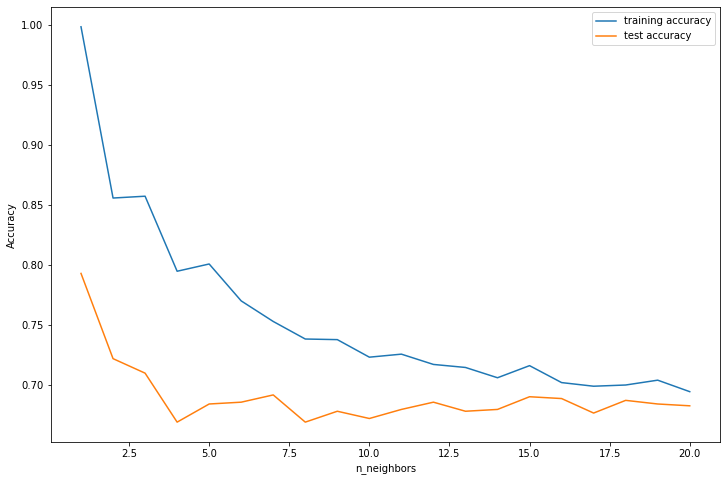

The optimal number of neighbors is: 1


In [30]:
#KNN
opt_neighbors = optimal_neighbors(X_data        = Apprentice_Chef_data,
                                  y_data        = Apprentice_Chef_target,
                                  response_type = 'class')

In [31]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(Apprentice_Chef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(Apprentice_Chef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            Apprentice_Chef_target,
            random_state = 219,
            test_size = 0.25,
            stratify = Apprentice_Chef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(X_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.9985
Testing  ACCURACY: 0.8245
AUC Score        : 0.8246


The data seems to continue to overfit but the AUC score increased significantly. So far, this is the best model to use.
<hr>

<h4>Decision Tree with Tuned Hyperparameters</h4>

In [42]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 10, 1)
leaf_space      = pd.np.arange(1, 120, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(Apprentice_Chef_data, Apprentice_Chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

<ipython-input-42-99f3cab859aa>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 10, 1)
<ipython-input-42-99f3cab859aa>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 120, 1)


Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 46, 'max_depth': 8, 'criterion': 'entropy'}
Tuned Training AUC: 0.6589


In [43]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed
model_fit=tree_tuned.fit(X_train, y_train)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(X_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.6885
Testing  ACCURACY: 0.6536
AUC Score        : 0.6536


We see from this score that is the highest AUC score so far. Also, the accuracy between the training and testing is not a big gap which can mean that the model is functioning properly and it is not overfitting.
<br>
<br>
We create the confusion matrix to see the outcome of the predictions.

In [34]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 280
False Positives: 50
False Negatives: 103
True Positives : 228



<h4>Random Forest</h4>

In [46]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [47]:
# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.787
Testing  ACCURACY: 0.705
AUC Score        : 0.705


The AUC score from this model drops from the one we had before and the gap in the data is much higher.
<hr>
<h4>Final Table with results of the selected model<h/4>

In [37]:
# comparing results
print(f"""
Model     Training Accuracy  Testing Accuracy   AUC Score      TN, FP, FN, TP
-----         ---------      --------------    -----------     ---------------
Tuned Tree   {tree_tuned_train_score}              {tree_tuned_test_score}          {tree_tuned_auc}        {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Tuned Tree'],
           
    'AUC Score' : [tree_tuned_auc, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [tree_tuned_train_score],
           
    'Testing Accuracy'  : [tree_tuned_test_score],

    'Confusion Matrix'  : [(tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp)]}


Model     Training Accuracy  Testing Accuracy   AUC Score      TN, FP, FN, TP
-----         ---------      --------------    -----------     ---------------
Tuned Tree   0.9278              0.7685          0.7687        (280, 50, 103, 228)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>3. Conclusion</h2><br>

In the beginning, the data was not showing to be fitting to any model. Analyzing it and viewing the correlation of each variable towards CROSS_SELL_SUCCESS allowed to understand the problem.
By balancing the data and doing oversampling it allowed for the models to create better results. 
In the end the best model turned out to be the Tuned Tree with an AUC score of 0.9304, training accuracy of 0.9112, testing accuracy 0f 0.9304 and running with the variables in the dictionary of 'logit_sig_2' which includes the following: 'MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON','MOBILE_LOGINS', 'EARLY_DELIVERIES',
'AVG_PREP_VID_TIME', 'personal', 'professional', 'potential_male', 'potential_female'.